---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

---

## ▣ 데이터 소개
[기본 데이터]
* 학습데이터 : traindata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [과제1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [7]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import warnings
warnings.filterwarnings(action='ignore')

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [102]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
df = pd.read_csv('traindata.csv')
df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [103]:
df = pd.read_csv('traindata.csv')
df["date"] = pd.to_datetime(df["date"])
df['date'].dt.date
df.dtypes

date             datetime64[ns]
hour                      int64
PM10                    float64
PM2.5                   float64
ozone                   float64
temperature             float64
precipitation             int64
windspeed               float64
humidity                  int64
visibility                int64
count                     int64
dtype: object

In [104]:
df.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

In [10]:
df['PM10'] = df['PM10'].interpolate(method="linear")
df['PM2.5'] = df['PM2.5'].interpolate(method="linear")
df['ozone'] = df['ozone'].interpolate(method="linear")
df.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

0.137
0


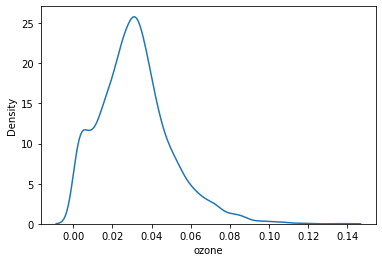

In [100]:
sns.kdeplot(df['ozone'])
print(df['ozone'].max())
print(df['ozone'].isna().sum())

### [과제2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1 : 1시간전 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 온도와 따릉이 대여량간에는 연관성이 없다.

    ㅇ 대립가설 : 온도와 따릉이 대여량간에는 연관성이 있다.

- 가설 3 : PM2.5 (초미세먼지 수치)와 따릉이 대여량간에는 연관성이 없다.

    ㅇ 대립가설 : PM2.5 (초미세먼지 수치)와 따릉이 대여량간에는 연관성이 있다.

- 가설 4 : hour(시간)와 따릉이 대여량간에는 연관성이 없다.

    ㅇ 대립가설 : hour(시간)와 따릉이 대여량간에는 연관성이 있다.

- 가설 5 : 습도와 미세먼지, 초미세먼지 수치가 관계가 없거나
            관계가 있어도 습도와 미세먼지, 초미세먼지 / 따릉이 대여량 간의 관계가 없다

    ㅇ 대립가설 : 습도와 미세먼지, 초미세먼지 수치가 관계가 있다.
            관계가 있을 경우 습도와 미세먼지, 초미세먼지 / 따릉이 대여량 간의 관계를 분석

- 가설 6 : 날짜와 따릉이 대여량간에는 연관성이 없다.

    ㅇ 대립가설 : 날짜와 따릉이 대여량간에는 연관성이 있다.

### [과제3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

In [11]:
시간의 흐름

SyntaxError: invalid syntax (2938038166.py, line 1)

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.
수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
df.shape # 누락된 미세먼지, 오존의 변화량은 시간의 흐름에 따라 앞뒤 값에 종속되어 있을 것으로 판단
# 따라서 interpolate (linear)로 채움 <-- 앞뒤의 중간값

In [ ]:
df.isna().sum()

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요
pd.options.display.float_format = '{:.1f}'.format
df.describe()

5. 변수의 분포 확인

In [ ]:
sns.distplot(df['hour'],bins=30) # 의미없음

In [ ]:
df.drop('date', axis = 1)
plt.figure(figsize = (16, 16))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [12]:
#변수의 자료형을 확인해보세요.
수치형

NameError: name '수치형' is not defined

3. 변수의 결측치 존재 여부 및 조치방안

In [13]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
없음

NameError: name '없음' is not defined

4. 변수의 기초 통계량 확인

In [14]:
#변수의 기초 통계량을 확인해보세요
df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


5. 변수의 분포 확인

<AxesSubplot:xlabel='temperature', ylabel='Density'>

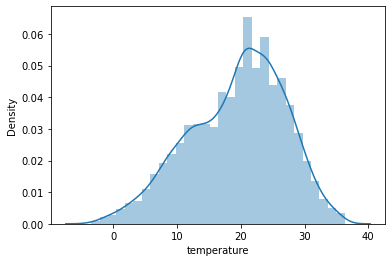

In [15]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(df['temperature'], bins = 30)

6. 위 정보로 부터 파악한 내용 정리

In [16]:
#위 정보로부터 파악하신 내용을 정리해보세요.
# 20~25도를 기준으로 찌그러진 정규분포의 형태를 보임

7. 추가 분석사항 도출

In [17]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [18]:
#변수의 자료형을 확인해보세요.
범주형

NameError: name '범주형' is not defined

3. 변수의 결측치 존재 여부 및 조치방안

In [19]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [20]:
#변수의 기초 통계량을 확인해보세요


5. 변수의 분포 확인

In [21]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
df['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

In [22]:
df = pd.read_csv('traindata.csv')
df["date"] = pd.to_datetime(df["date"])
df['date'].dt.date
df.dtypes

date             datetime64[ns]
hour                      int64
PM10                    float64
PM2.5                   float64
ozone                   float64
temperature             float64
precipitation             int64
windspeed               float64
humidity                  int64
visibility                int64
count                     int64
dtype: object

In [23]:
df['PM10'] = df['PM10'].interpolate(method="linear")
df['PM2.5'] = df['PM2.5'].interpolate(method="linear")
df['ozone'] = df['ozone'].interpolate(method="linear")
df.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

In [24]:
df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [25]:
df.groupby(['precipitation'], as_index = True)['PM10', 'PM2.5'].mean()

,PM10,PM2.5
precipitation,,
0,32.990712,16.154867
1,17.668258,9.253939


6. 위 정보로 부터 파악한 내용 정리

In [456]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [457]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [458]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [459]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [460]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

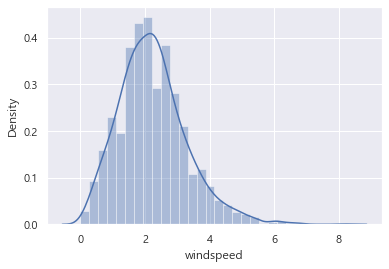

In [461]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(df['windspeed'], bins = 30)

6. 위 정보로 부터 파악한 내용 정리

In [462]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [463]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [464]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [465]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [466]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [467]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [468]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [469]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [470]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [471]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [472]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

<AxesSubplot:xlabel='visibility', ylabel='Density'>

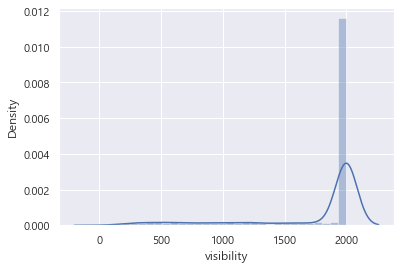

In [473]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(df['visibility'], bins = 30)

6. 위 정보로 부터 파악한 내용 정리

In [474]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [475]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [476]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [477]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [478]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

<AxesSubplot:xlabel='ozone', ylabel='Density'>

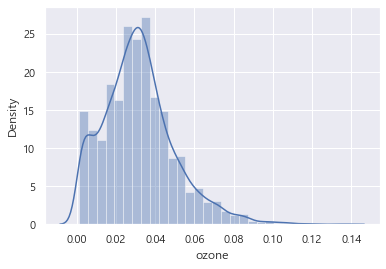

In [479]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(df['ozone'], bins = 30)

6. 위 정보로 부터 파악한 내용 정리

In [480]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [481]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [482]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [483]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [484]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

<AxesSubplot:xlabel='PM10', ylabel='Density'>

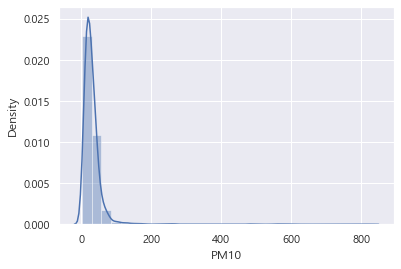

In [485]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(df['PM10'], bins = 30)

6. 위 정보로 부터 파악한 내용 정리

In [486]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [487]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [488]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [489]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [490]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [491]:
df

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.0,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.0,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.0,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.0,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.0,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.0,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.0,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.0,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.0,8.2,0,2.1,71,1262,125


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

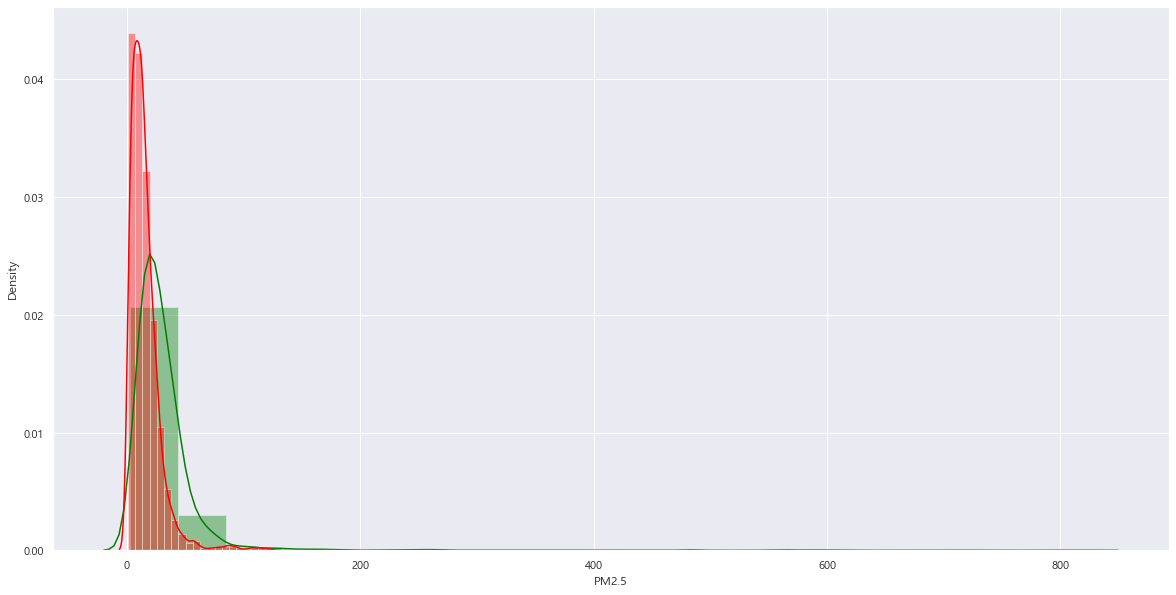

In [492]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
plt.figure(figsize = (20, 10))
sns.distplot(df["PM10"], color="green", label="PM10", bins = 20)
sns.distplot(df["PM2.5"], color='red', label="PM10", bins = 20)
# sns.distplot(df["PM10"], color="green", label="PM10")

6. 위 정보로 부터 파악한 내용 정리

In [493]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [494]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [495]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [496]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [497]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

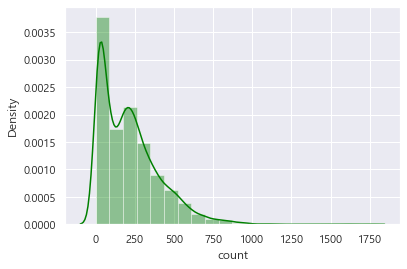

In [498]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(sns.distplot(df["count"], color="green", bins = 20))

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [499]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### 4.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

In [500]:
df.columns

Index(['date', 'hour', 'PM10', 'PM2.5', 'ozone', 'temperature',
       'precipitation', 'windspeed', 'humidity', 'visibility', 'count'],
      dtype='object')

1. 강수 여부와 따릉이 대여량간 이변량 분석

<AxesSubplot:xlabel='precipitation'>

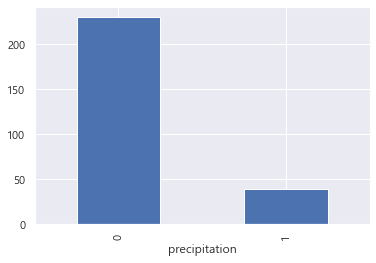

In [501]:
temp2 = df.groupby(by = ['precipitation'], as_index = True)['count'].mean()
temp2.plot.bar()

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

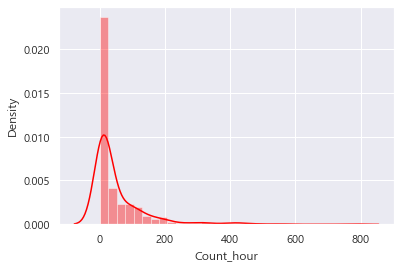

In [502]:
df['Count_hour'] = df['count'].shift(-1)
df.dropna(axis=0)
df_rain = df.loc[df['precipitation'] == 1]
df_rain = df_rain.astype({'Count_hour':'int'})
sns.distplot(sns.distplot(df_rain["Count_hour"], color="red", bins = 30))
df_rain

In [ ]:
df_rain

In [ ]:
# df['Count_hour_pre'] = df['count'].shift(-1)
# df.dropna(axis=0)
# df_rain_pre = df.loc[df['precipitation'] == 0]
# df_rain_pre_drop = df_rain_pre.dropna(axis = 0)
# df_rain_pre_drop.isna().sum()
# df_rain_pre_drop.dtypes
# # df_rain_pre_drop = df_rain_pre.astype({'Count_hour_pre':'int'})
# sns.distplot(df_rain_pre_drop["Count_hour_pre"], color="blue", bins = 30)

<AxesSubplot:xlabel='count', ylabel='Density'>

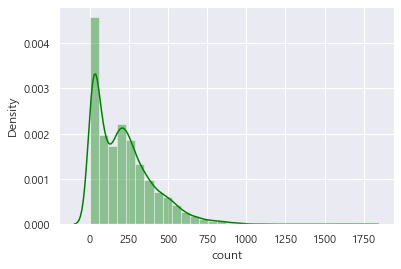

In [503]:
sns.distplot(df["count"], color="green", bins = 30)

In [504]:
df = pd.read_csv('traindata.csv')
df["date"] = pd.to_datetime(df["date"])
df['date'].dt.date
df['PM10'] = df['PM10'].interpolate(method="linear")
df['PM2.5'] = df['PM2.5'].interpolate(method="linear")
df['ozone'] = df['ozone'].interpolate(method="linear")
df.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

<AxesSubplot:xlabel='Count_hour', ylabel='Density'>

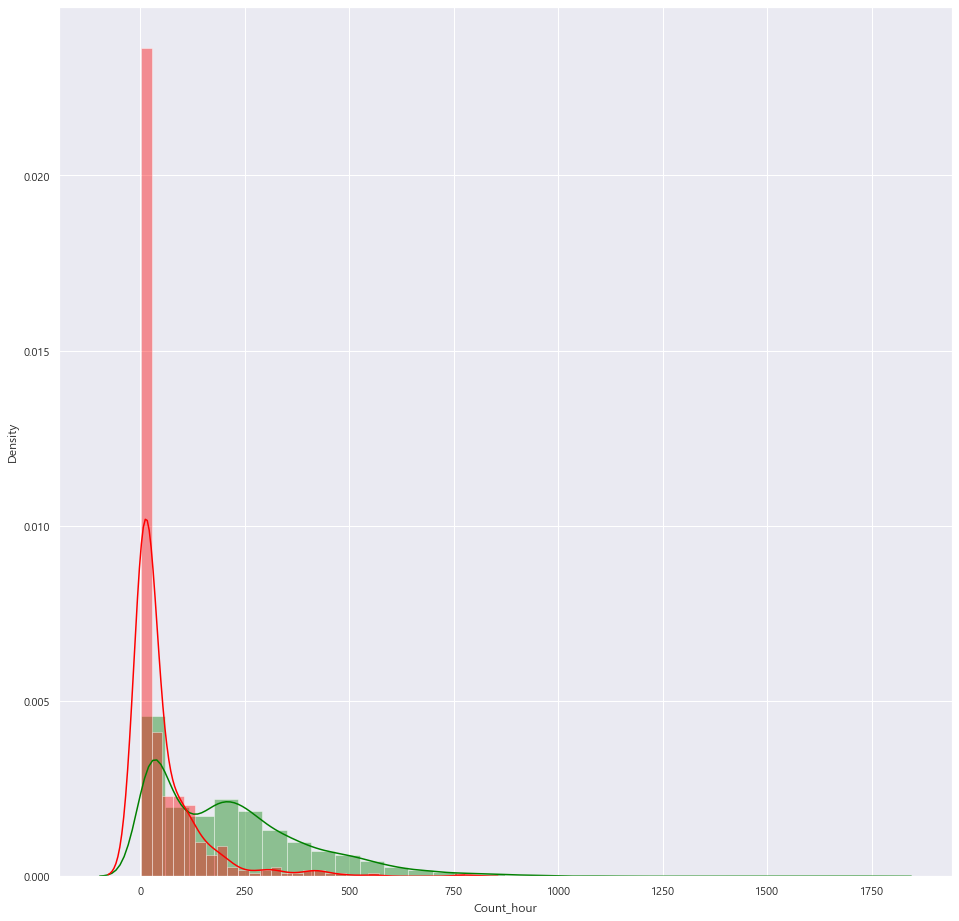

In [505]:
plt.figure(figsize = (16, 16))
sns.distplot(df["count"], color="green", bins = 30)
sns.distplot(df_rain["Count_hour"], color="red", bins = 30)
# sns.distplot(df_rain_pre_drop["Count_hour_pre"], color="blue", bins = 30)

In [506]:
df.dtypes

date             datetime64[ns]
hour                      int64
PM10                    float64
PM2.5                   float64
ozone                   float64
temperature             float64
precipitation             int64
windspeed               float64
humidity                  int64
visibility                int64
count                     int64
dtype: object

<AxesSubplot:xlabel='precipitation', ylabel='count'>

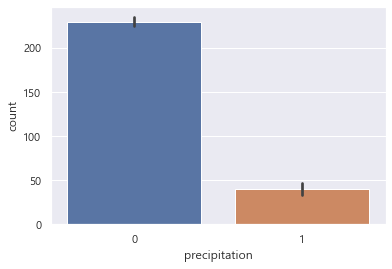

In [507]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(x="precipitation", y="count", data = df)

In [508]:
df_not_rain = df.loc[df['precipitation'] == 0]


#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [509]:
df = pd.read_csv('traindata.csv')
df["date"] = pd.to_datetime(df["date"])
df['date'].dt.date
df['PM10'] = df['PM10'].interpolate(method="linear")
df['PM2.5'] = df['PM2.5'].interpolate(method="linear")
df['ozone'] = df['ozone'].interpolate(method="linear")
df.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

<AxesSubplot:xlabel='hour'>

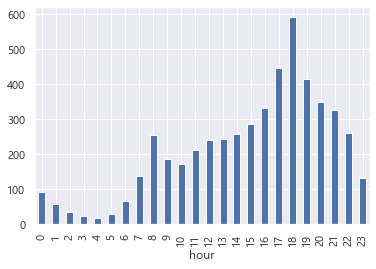

In [510]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
temp1 = df.groupby(by = ['hour'], as_index = True)['count'].mean()
temp1.plot.bar()

3. 온도 데이터와 따릉이 대여량간 분석

<AxesSubplot:xlabel='temperature'>

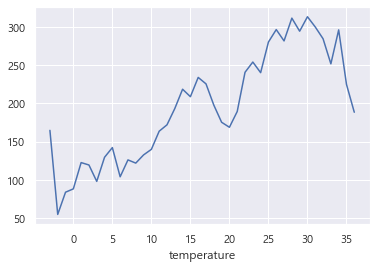

In [511]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
df = df.astype({'temperature':'int'})
temp3 = df.groupby(by = ['temperature'], as_index = True)['count'].mean()
temp3.plot()

4. 풍속 데이터와 따릉이 대여량간 분석

<AxesSubplot:xlabel='windspeed'>

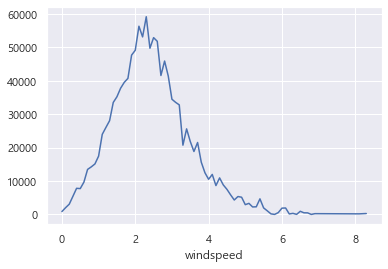

In [512]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
temp4 = df.groupby(by = ['windspeed'], as_index = True)['count'].sum()
temp4.plot()

5. 습도 데이터와 따릉이 대여량간 분석

<AxesSubplot:xlabel='humidity'>

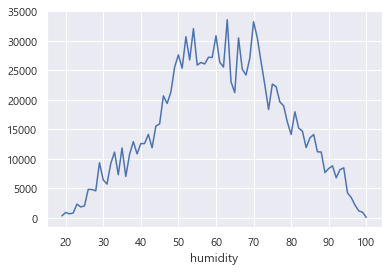

In [513]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
temp5 = df.groupby(by = ['humidity'], as_index = True)['count'].sum()
temp5.plot()

6. 시정 데이터와 따릉이 대여량간 분석

In [514]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
temp6 = df.groupby(by = ['visibility'], as_index = True)['count'].sum()
temp6

visibility
60           60
61            2
68           20
73            5
77            8
         ...   
1996       1428
1997       1044
1998         99
1999       1285
2000    1023045
Name: count, Length: 1032, dtype: int64

7. 오존 데이터와 따릉이 대여량간 분석

<AxesSubplot:xlabel='ozone'>

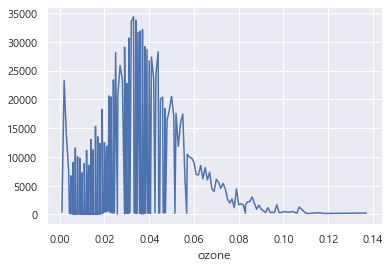

In [515]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
temp7 = df.groupby(by = ['ozone'], as_index = True)['count'].sum()
temp7.plot()

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

<AxesSubplot:xlabel='PM10'>

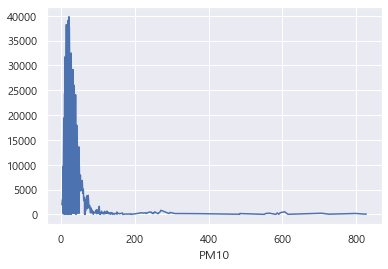

In [516]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
temp8 = df.groupby(by = ['PM10'], as_index = True)['count'].sum()
temp8.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x257365d3310>,
 'caps': [<matplotlib.lines.Line2D at 0x257365d38b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x257365d3040>],
 'medians': [<matplotlib.lines.Line2D at 0x257365d3e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x257365e1190>],
 'means': []}

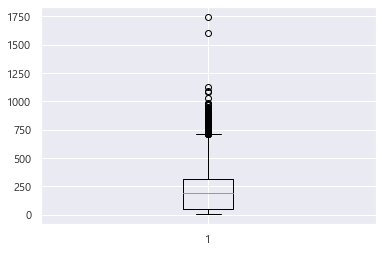

In [517]:
count = df['count']
plt.boxplot(count)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

<AxesSubplot:xlabel='PM2.5'>

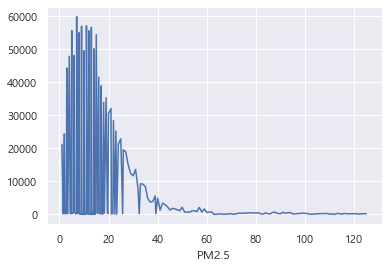

In [518]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
temp9 = df.groupby(by = ['PM2.5'], as_index = True)['count'].sum()
temp9.plot()

## 이상치 분석

In [93]:
df['Weekday'] = df['date'].dt.dayofweek
display(df)
display(df_outlier = df.loc[df['count'] >= 750].sort_values('humidity', ascending = False))
display(df_outlier.loc[df['count'] >= 1000].sort_values('temperature'))

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,Weekday
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,3
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,3
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,3
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,3
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,0
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,0
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,0
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,0


,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,Weekday
664,2021-04-28,17,53.0,15.0,0.037,17.1,0,3.0,42,2000,1126,2
665,2021-04-28,18,49.0,15.0,0.033,17.2,0,3.0,40,2000,1600,2
3711,2021-09-02,19,17.0,9.0,0.039,24.9,0,1.1,66,2000,1086,3
3710,2021-09-02,18,20.0,8.0,0.043,25.4,0,2.1,65,2000,1746,3
3709,2021-09-02,17,15.0,7.0,0.046,25.8,0,1.5,63,2000,1090,3
3734,2021-09-03,18,6.0,6.0,0.045,28.0,0,2.3,44,2000,1026,4


## 시간대는 모두 공통적으로 오후, 15~19시 사이이며
    - 온습도가 쾌적하거나
    - 미세먼지, 초미세먼지가 적을 경우 / 시계(가시성)가 좋을경우 높은 대여율을 보임

In [520]:
df.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,Weekday
count,5827.0,5827.0,5827.0,5827.0,5827.0,5827.0,5827.0,5827.0,5827.0,5827.0,5827.0
mean,11.5,31.8,15.6,0.0,18.9,0.1,2.2,68.6,1758.4,215.1,3.0
std,6.9,42.7,13.8,0.0,7.5,0.3,1.1,17.3,491.0,186.0,2.0
min,0.0,3.0,1.0,0.0,-3.0,0.0,0.0,19.0,60.0,1.0,0.0
25%,6.0,16.0,7.0,0.0,14.0,0.0,1.5,56.0,1935.5,53.0,1.0
50%,12.0,25.0,13.0,0.0,20.0,0.0,2.2,70.0,2000.0,186.0,3.0
75%,18.0,37.0,20.0,0.0,24.0,0.0,2.8,82.0,2000.0,315.0,5.0
max,23.0,827.0,125.0,0.1,36.0,1.0,8.3,100.0,2000.0,1746.0,6.0


### 5. 가설 검정

# 가설 1 : 1시간전 강우 여부와 따릉이간에는 연관성이 있다.
    
    ㅇ 귀무가설 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 없다.

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')   

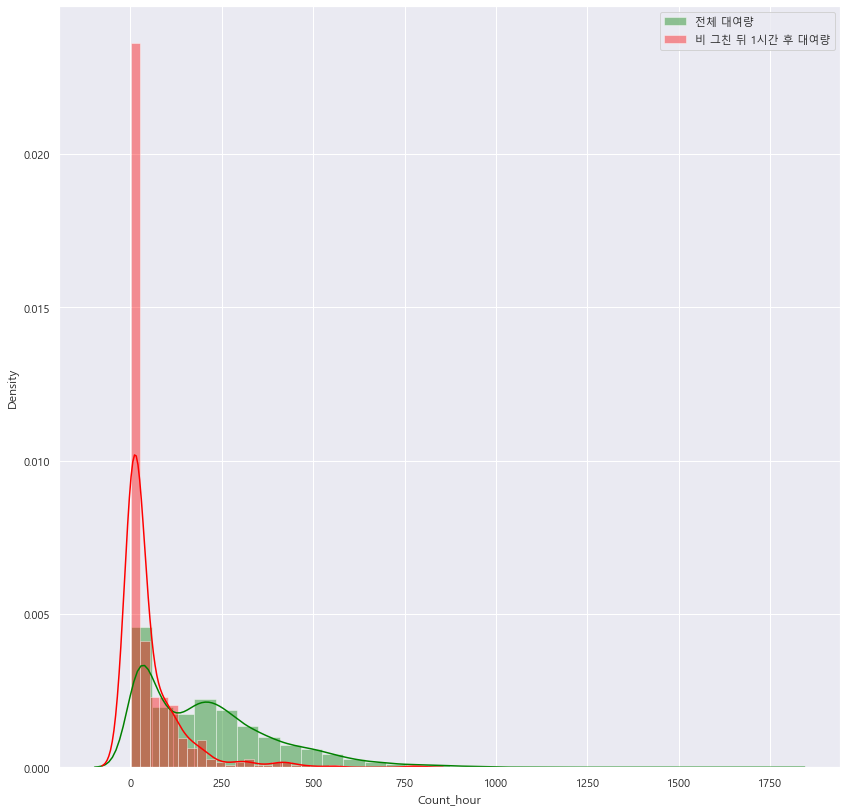

In [395]:
plt.figure(figsize = (14, 14))
sns.distplot(df["count"], color="green", bins = 30, label='전체 대여량')
sns.distplot(df_rain["Count_hour"], color="red", bins = 30, label='비 그친 뒤 1시간 후 대여량')
# sns.distplot(df_rain_pre_drop["Count_hour_pre"], color="blue", bins = 30, label='전체 - 강우 1시간 후')
plt.legend()
plt.show()

In [279]:
spst.pearsonr(df["count"], df["precipitation"])

(-0.26985853775618945, 8.862391840558463e-98)

### 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.
   - 대립가설 채택

# 가설 2 : 온도와 따릉이 대여량간에는 연관성이 있다.

    ㅇ 귀무가설 : 온도와 따릉이 대여량간에는 연관성이 없다.

<AxesSubplot:xlabel='temperature'>

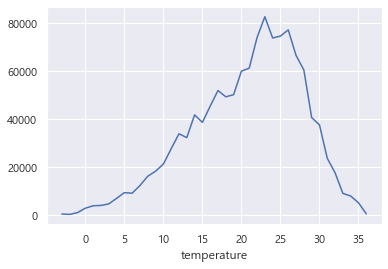

In [294]:
tempp = df.groupby(by = ['temperature'], as_index = True)['count'].sum()
tempp.plot()

### 온도와 따릉이 대여량간에는 연관성이 있다.
   - 산점도에서는 관계가 잘 드러나지 않음 ( 너무 온도가 높아도 자전거를 타기 적합하지 않기 때문에
     단방향으로만 파악하기에는 무리가 있음 )
   - 따라서 단순 plot 파악 결과 자전거를 타기 적합한 20 ~ 27도 사이에 대여량이 증가했음을 알 수 있음
   - 대립가설 채택

# 가설 3 : PM2.5 (초미세먼지 수치)와 따릉이 대여량간에는 연관성이 있다.

    ㅇ 귀무가설 : PM2.5 (초미세먼지 수치)와 따릉이 대여량간에는 연관성이 없다.

<AxesSubplot:xlabel='PM2.5'>

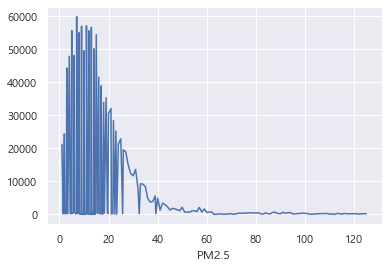

In [311]:
temp9 = df.groupby(by = ['PM2.5'], as_index = True)['count'].sum()
temp9.plot()

PM2.5
1.0      21167
1.5        169
1.6        245
2.0      24302
2.2        253
         ...  
120.0      209
121.0      242
122.0      108
123.0      222
125.0      221
Name: count, Length: 174, dtype: int64


(0.034833977797175945, 0.007830765224579699)

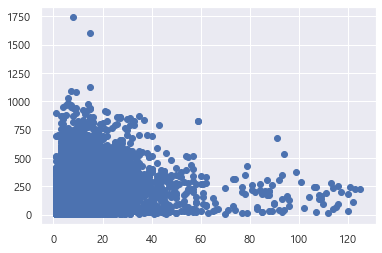

In [315]:
temp9 = df.groupby(by = ['PM2.5'], as_index = True)['count'].sum()
print(temp9)
plt.scatter(df['PM2.5'], df['count'])
spst.pearsonr(df["PM2.5"], df["count"])

### 초미세먼지와 따릉이 대여량간에는 연관성이 있다.
   - 산점도에서는 관계가 잘 드러나지 않음 ( 초미세먼지가 20 이하일때 너무 많은 값이 몰려있어 미세먼지 수치가
     높을때의 대여량이 상대적으로 무시됨)
   - 따라서 단순 plot 파악 결과 초미세먼지 농도가 20 이하인 상황에서 대여량이 급증했음을 알 수 있음
   - 대립가설 채택

# 가설 4 : hour(시간)와 따릉이 대여량간에는 연관성이 있다.

    ㅇ 귀무가설 : hour(시간)와 따릉이 대여량간에는 연관성이 없다.

<AxesSubplot:xlabel='hour'>

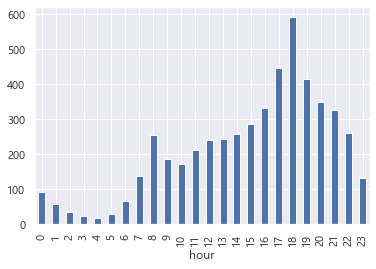

In [317]:
temp1 = df.groupby(by = ['hour'], as_index = True)['count'].mean()
temp1.plot.bar()

### 시간대와 따릉이 대여량간에는 연관성이 있다.
   - 산점도에서는 관계가 잘 드러나지 않음 ( 온도와 같은 케이스 )
   - 따라서 단순 plot 파악 결과 일반적인 9 to 6 근무환경을 고려해볼때
     퇴근시간 근처에서 대여량이 급증했음을 알 수 있음
   - 대립가설 채택

# 가설 5 : 주말에 대여량이 늘어날 것이다.

    ㅇ 귀무가설 : 대여량이 주말과는 관련이 없다.

In [427]:
df.columns

Index(['date', 'hour', 'PM10', 'PM2.5', 'ozone', 'temperature',
       'precipitation', 'windspeed', 'humidity', 'visibility', 'count',
       'Count_hour'],
      dtype='object')

In [544]:
df_week = df['Weekday']
array = np.array(df_week.index.values)
array.reshape(-1, 1)
array.shape
# df['Weekday'].reshape(-1, 1)
# df['Weekend'] = df.loc[df['Weekday'].isin([5, 6])]
# df

(5827,)

In [4]:
df = pd.read_csv('traindata.csv')
df["date"] = pd.to_datetime(df["date"])
df['date'].dt.date
df['PM10'] = df['PM10'].interpolate(method="linear")
df['PM2.5'] = df['PM2.5'].interpolate(method="linear")
df['ozone'] = df['ozone'].interpolate(method="linear")
df.isna().sum()


df.groupby(by = ['humidity'], as_index = True)['PM2.5_shift'].mean()
df.groupby(by = ['humidity'], as_index = True)['PM10_shift'].mean()


KeyError: 'Column not found: PM2.5_shift'

초미세먼지와 습도와의 상관계수, p-value:(-0.03778609827684685, 0.003916559411411712)
미세먼지와 습도와의 상관계수, p-value:(-0.08972774144035206, 6.803510056489623e-12)


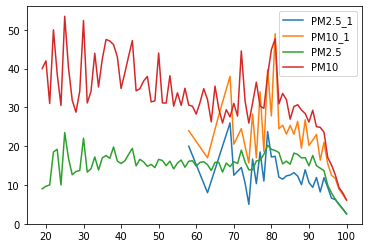

In [56]:
df_rain1 = df.loc[df['precipitation'] == 1]
plt.plot(df_rain1.groupby(by = ['humidity'], as_index = True)['PM2.5'].mean(), label = 'PM2.5_1')
plt.plot(df_rain1.groupby(by = ['humidity'], as_index = True)['PM10'].mean(), label = 'PM10_1')
plt.plot(df.groupby(by = ['humidity'], as_index = True)['PM2.5'].mean(), label = 'PM2.5')
plt.plot(df.groupby(by = ['humidity'], as_index = True)['PM10'].mean(), label = 'PM10')
print('초미세먼지와 습도와의 상관계수, p-value:', end='')
print(spst.pearsonr(df["humidity"], df["PM2.5"]))
print('미세먼지와 습도와의 상관계수, p-value:', end='')
print(spst.pearsonr(df["humidity"], df["PM10"]))
plt.legend()

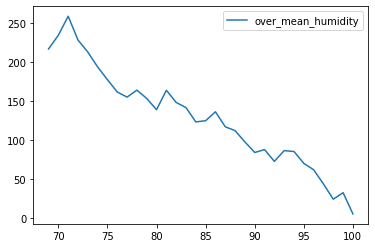

In [89]:
df_hum_mean = df['humidity'].mean()
df_hum_down = df.loc[df['humidity'] > df_hum_mean]
plt.plot(df_hum_down.groupby(by = ['humidity'], as_index = True)['count'].mean(), label = 'over_mean_humidity')
plt.legend()

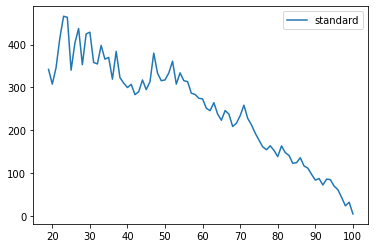

In [88]:
plt.plot(df.groupby(by = ['humidity'], as_index = True)['count'].mean(), label = 'standard')
plt.legend()

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### 6. Insight 도출